In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load Cleaned Dataset

df = pd.read_csv('New Cleaned data.csv')
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_encoded
0,0,67,1,0,176.0,148.0,1,0,137.5,1,5.6,3,3,0.0,0
1,1,57,1,1,155.0,551.0,0,1,98.0,1,3.2,2,4,0.0,0
2,2,43,1,0,125.0,519.0,1,0,113.0,1,3.2,1,4,1.0,2
3,3,71,0,0,123.0,285.0,0,2,156.0,0,6.2,3,1,1.0,2
4,4,36,0,0,122.0,488.0,1,1,137.5,1,3.3,3,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,494,38,0,0,153.0,539.0,1,1,91.0,0,4.7,3,4,0.0,2
449,495,47,1,1,147.0,239.0,1,2,105.0,1,2.9,2,1,0.0,2
450,496,60,1,2,98.0,270.0,1,0,100.0,1,5.4,1,0,0.0,2
451,497,29,1,2,138.0,353.5,1,0,127.0,0,1.3,2,1,0.0,2


In [3]:
# Drop index column 

df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_encoded
0,67,1,0,176.0,148.0,1,0,137.5,1,5.6,3,3,0.0,0
1,57,1,1,155.0,551.0,0,1,98.0,1,3.2,2,4,0.0,0
2,43,1,0,125.0,519.0,1,0,113.0,1,3.2,1,4,1.0,2
3,71,0,0,123.0,285.0,0,2,156.0,0,6.2,3,1,1.0,2
4,36,0,0,122.0,488.0,1,1,137.5,1,3.3,3,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,38,0,0,153.0,539.0,1,1,91.0,0,4.7,3,4,0.0,2
449,47,1,1,147.0,239.0,1,2,105.0,1,2.9,2,1,0.0,2
450,60,1,2,98.0,270.0,1,0,100.0,1,5.4,1,0,0.0,2
451,29,1,2,138.0,353.5,1,0,127.0,0,1.3,2,1,0.0,2


In [4]:
# Prepare Features and Target

x = df.drop(columns=['target'])
y = df['target']

In [5]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
x[num_cols] = scaler.fit_transform(x[num_cols])

In [6]:
# Train-Test Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_encoded
24,-1.033996,0,2,-0.837981,1.019432,0,0,0.866426,1,1.612019,1,4,2
17,0.049547,0,0,1.379539,-1.469482,1,1,1.227069,1,-0.012485,2,4,2
66,-0.801808,1,0,-1.588526,-1.202812,0,0,1.088360,0,1.190852,1,4,2
302,0.591319,0,0,-1.281484,0.865895,0,2,-0.007441,1,-1.155655,3,4,0
422,0.049547,0,0,0.151374,1.617417,0,0,0.949651,1,0.890017,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.049547,1,0,-0.974443,0.421446,0,2,-0.465180,1,0.107849,3,1,1
270,-1.807956,0,1,0.014911,0.122453,0,2,0.450299,1,1.551853,1,3,2
348,0.049547,0,2,1.345423,0.267909,1,1,0.200623,0,-0.192985,3,0,2
435,0.049547,1,0,1.311307,0.914380,1,0,0.117397,0,0.890017,2,0,1


In [8]:
# Check class distribution
print(y.value_counts())

# Check class distribution in percentage
print("\nClass Distribution (in %):\n", y.value_counts(normalize=True) * 100)


target
0.0    238
1.0    215
Name: count, dtype: int64

Class Distribution (in %):
 target
0.0    52.538631
1.0    47.461369
Name: proportion, dtype: float64


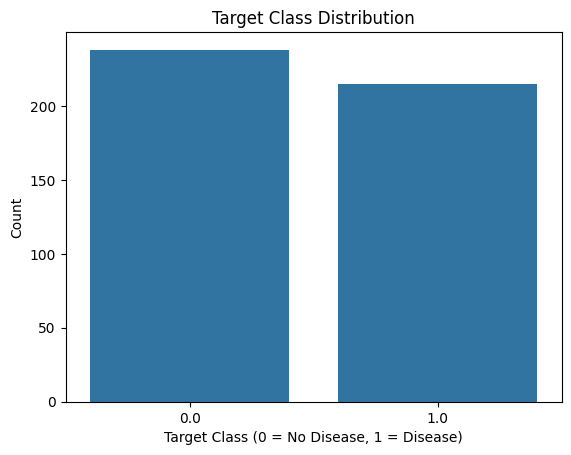

In [9]:
sns.countplot(x=y)
plt.title('Target Class Distribution')
plt.xlabel('Target Class (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()


In [11]:
# Train Models
log_model = LogisticRegression(max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier( random_state=42)
forest_model = RandomForestClassifier(n_estimators=150, random_state=42)
Knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)

log_model.fit(x_train, y_train)
tree_model.fit(x_train, y_train)
forest_model.fit(x_train, y_train)
Knn_model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
# Predict and Accuracy - Accuracy will be calculate on testing dataset

log_acc = accuracy_score(y_test, log_model.predict(x_test))
tree_acc = accuracy_score(y_test, tree_model.predict(x_test))
forest_acc = accuracy_score(y_test, forest_model.predict(x_test))
knn_acc = accuracy_score(y_test, forest_model.predict(x_test))       

print("Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100}%")
print(f"Decision Tree Accuracy: {tree_acc*100}%")
print(f"Random Forest Accuracy: {forest_acc*100}%")
print(f"Knn Naive Bayes Accuracy: {knn_acc*100}%")

Model Accuracies:
Logistic Regression Accuracy: 53.84615384615385%
Decision Tree Accuracy: 56.043956043956044%
Random Forest Accuracy: 50.54945054945055%
Knn Naive Bayes Accuracy: 50.54945054945055%


In [15]:
# User Input for Prediction
print("\n Enter patient details to predict heart disease:")

input_data = {
    'age': float(input("Enter Age: ")),
    'sex': int(input("Enter Sex (1=Male, 0=Female): ")),
    'cp': int(input("Enter Chest Pain Type (0-3): ")),
    'trestbps': float(input("Enter Resting Blood Pressure: ")),
    'chol': float(input("Enter Cholesterol: ")),
    'fbs': int(input("Fasting Blood Sugar > 120 mg/dl (1=True, 0=False): ")),
    'restecg': int(input("Resting ECG results (0-2): ")),
    'thalach': float(input("Enter Max Heart Rate Achieved: ")),
    'exang': int(input("Exercise Induced Angina (1=Yes, 0=No): ")),
    'oldpeak': float(input("Enter ST depression: ")),
    'slope': int(input("Slope of ST segment (1-3): ")),
    'ca': int(input("Number of Major Vessels (0-3): ")),
    'thal_encoded': int(input("Thal (0=Fixed, 1=Normal, 2=Reversible): "))
}

# Convert Input to DataFrame
user_df = pd.DataFrame([input_data])

# Predict Using All Models
log_pred = log_model.predict(user_df)[0]
tree_pred = tree_model.predict(user_df)[0]
forest_pred = forest_model.predict(user_df)[0]
knn_pred = Knn_model.predict(user_df)[0]

# Show Predictions
print(" Model Predictions:")
print("Logistic Regression:", "Heart Disease" if log_pred == 1 else "No Heart Disease")
print("Decision Tree:", "Heart Disease" if tree_pred == 1 else "No Heart Disease")
print("Random Forest:", "Heart Disease" if forest_pred == 1 else "No Heart Disease")
print("Knn Classifier :","Heart Disease" if knn_pred == 1 else "No Heart Disease" )


 Enter patient details to predict heart disease:


Enter Age:  57
Enter Sex (1=Male, 0=Female):  1
Enter Chest Pain Type (0-3):  1
Enter Resting Blood Pressure:  155
Enter Cholesterol:  551
Fasting Blood Sugar > 120 mg/dl (1=True, 0=False):  0
Resting ECG results (0-2):  1
Enter Max Heart Rate Achieved:  98
Exercise Induced Angina (1=Yes, 0=No):  1
Enter ST depression:  3.2
Slope of ST segment (1-3):  2
Number of Major Vessels (0-3):  2
Thal (0=Fixed, 1=Normal, 2=Reversible):  0


 Model Predictions:
Logistic Regression: No Heart Disease
Decision Tree: Heart Disease
Random Forest: Heart Disease
Knn Classifier : No Heart Disease


 Model Accuracies:
Logistic Regression Accuracy: 53.85%
Decision Tree Accuracy: 56.04%
Random Forest Accuracy: 50.55%
Knn Classifier Accuracy :51.65%

 Confusion Matrix - Logistic Regression:
 [[34  8]
 [34 15]]

 Confusion Matrix - Decision Tree:
 [[27 15]
 [25 24]]

 Confusion Matrix - Random Forest:
 [[30 12]
 [33 16]]

 Confusion Matrix - Knn Classifier:
 [[26 16]
 [28 21]]


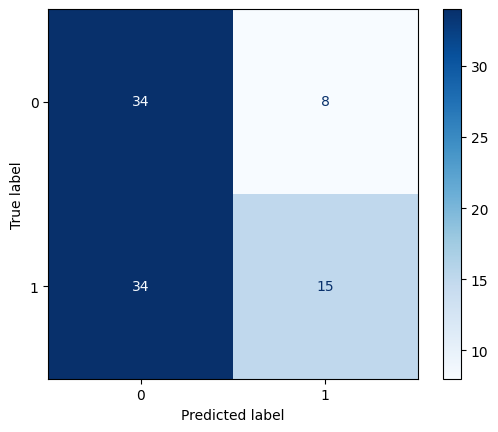

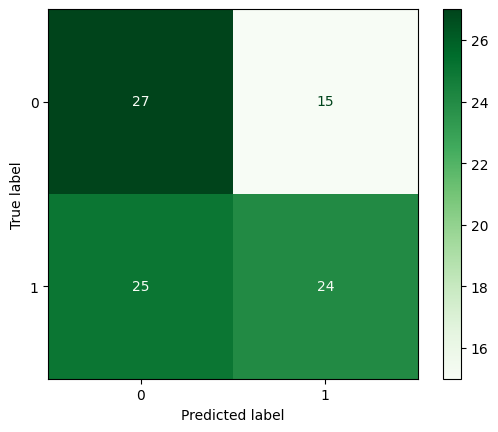

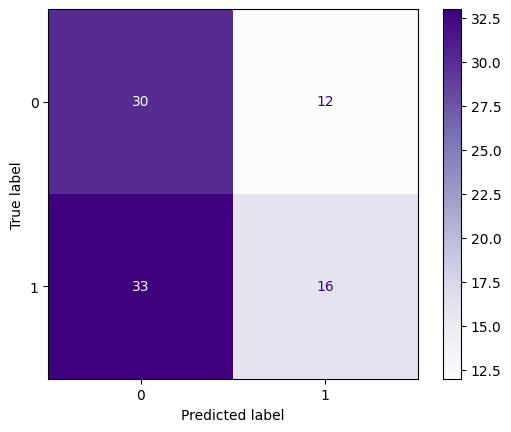

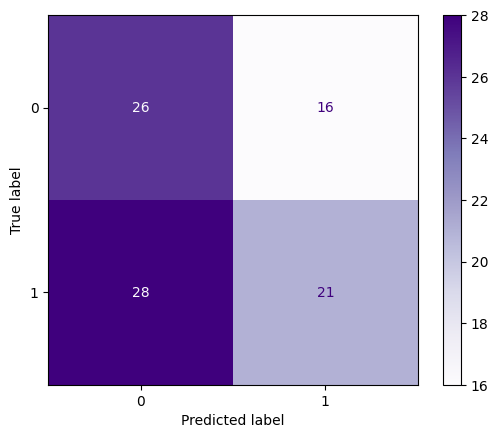

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Predict on test data
log_preds = log_model.predict(x_test)
tree_preds = tree_model.predict(x_test)
forest_preds = forest_model.predict(x_test)
knn_preds = Knn_model.predict(x_test)

# Accuracy Scores
log_acc = accuracy_score(y_test, log_preds)
tree_acc = accuracy_score(y_test, tree_preds)
forest_acc = accuracy_score(y_test, forest_preds)
knn_acc = accuracy_score(y_test,knn_preds)

# Print Accuracies
print(" Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100:.2f}%")
print(f"Decision Tree Accuracy: {tree_acc*100:.2f}%")
print(f"Random Forest Accuracy: {forest_acc*100:.2f}%")
print(f"Knn Classifier Accuracy :{knn_acc*100:.2f}%")

#  Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, log_preds)
print("\n Confusion Matrix - Logistic Regression:\n", cm_log)
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=[0, 1]).plot(cmap='Blues')

#  Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, tree_preds)
print("\n Confusion Matrix - Decision Tree:\n", cm_tree)
ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1]).plot(cmap='Greens')

#  Confusion Matrix for Random Forest
cm_forest = confusion_matrix(y_test, forest_preds)
print("\n Confusion Matrix - Random Forest:\n", cm_forest)
ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=[0, 1]).plot(cmap='Purples')

# Confusion Matrix for Knn classifier
cm_Knn = confusion_matrix(y_test,knn_preds)
print("\n Confusion Matrix - Knn Classifier:\n", cm_Knn)
ConfusionMatrixDisplay(confusion_matrix=cm_Knn, display_labels=[0, 1]).plot(cmap='Purples')

In [20]:
import pickle as pkl

In [21]:
pkl.dump(forest_model,open("HeartDisease.pkl","wb"))